# Random Forests

In [56]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
%matplotlib inline

import pydotplus
from IPython.display import Image


In [57]:
# Import csv file with tweets for elon musk
file_name='final_data_frame.csv'
file_path=Path(f"../Resources/{file_name}")
tweets_df = pd.read_csv(file_path, parse_dates=True, infer_datetime_format=True)
tweets_df.rename(columns={'Unnamed: 0': 'date' }, inplace=True)
tweets_df.set_index('date', inplace=True)
tweets_df

,TSLA,QQQ,Y_d1_pr_change_diff,Y_d5_pr_change_diff,quarterly report announcement flag,tweet count,number likes,number replies,number retweets clean,compound,...,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,4.778000,39.031284,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-06-30,4.766000,38.437302,0.012707,NaN,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-01,4.392000,38.329292,-0.075662,NaN,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-02,3.840000,38.221321,-0.122866,NaN,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-06,3.222000,38.338306,-0.163998,NaN,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,854.409973,316.040009,-0.000902,0.102563,0.0,11.0,1734427.0,40100.0,213435.0,0.5226,...,1,0,0,1,0,0,1,4,1,1
2021-01-14,845.000000,314.350006,-0.005666,0.037489,0.0,7.0,559632.0,14544.0,38701.0,0.9357,...,1,0,0,0,0,0,0,2,1,1
2021-01-15,826.159973,311.859985,-0.014375,-0.038729,0.0,11.0,169339.0,9381.0,12439.0,0.9429,...,0,0,0,1,0,0,0,1,1,1


In [58]:
dropped_na_df.isna().any()

TSLA                                  False
QQQ                                   False
Y_d1_pr_change_diff                   False
Y_d5_pr_change_diff                   False
quarterly report announcement flag    False
tweet count                           False
number likes                          False
number replies                        False
number retweets clean                 False
compound                              False
positive                              False
negative                              False
neutral                               False
sentiment                             False
model 3                               False
coming soon                           False
next week                             False
next year                             False
falcon 9                              False
falcon heavy                          False
model x                               False
next month                            False
space station                   

In [59]:
dropped_na_df = tweets_df.iloc[5:, :]
dropped_na_df

,TSLA,QQQ,Y_d1_pr_change_diff,Y_d5_pr_change_diff,quarterly report announcement flag,tweet count,number likes,number replies,number retweets clean,compound,...,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
date,,,,,,,,,,,,,,,,,,,,,
2010-07-07,3.160000,39.562256,-0.051168,-0.352239,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-08,3.492000,39.778240,0.099604,-0.302196,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-09,3.480000,40.156231,-0.012939,-0.255315,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-12,3.410000,40.273220,-0.023028,-0.165664,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
2010-07-13,3.628000,40.795197,0.050969,0.061924,0.0,0.0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,854.409973,316.040009,-0.000902,0.102563,0.0,11.0,1734427.0,40100.0,213435.0,0.5226,...,1,0,0,1,0,0,1,4,1,1
2021-01-14,845.000000,314.350006,-0.005666,0.037489,0.0,7.0,559632.0,14544.0,38701.0,0.9357,...,1,0,0,0,0,0,0,2,1,1
2021-01-15,826.159973,311.859985,-0.014375,-0.038729,0.0,11.0,169339.0,9381.0,12439.0,0.9429,...,0,0,0,1,0,0,0,1,1,1


In [60]:
# Define features set
X = dropped_na_df.copy()
X = dropped_na_df.iloc[:, 4:]
X.head()


,quarterly report announcement flag,tweet count,number likes,number replies,number retweets clean,compound,positive,negative,neutral,sentiment,...,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
date,,,,,,,,,,,,,,,,,,,,,
2010-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2010-07-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2010-07-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2010-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2010-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Define target vector
#y = tweets_df["col"].values.reshape(-1, 1)
y = dropped_na_df["Y_d1_pr_change_diff"].ravel()
y

array([-0.05116762,  0.09960394, -0.0129389 , ..., -0.01437472,
        0.00766969, -0.01627491])

In [62]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [63]:
# only `X_train` and `X_testing` DataFrames should be scaled
# Creating StandardScaler instance
scaler = StandardScaler()


In [64]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)


In [65]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Random Forest Model


In [66]:
# Create a random forest instance and train it with the training data (`X_train_scaled` and `y_train`), define `n_estimators=500 (?)` and `random_state=72 (?)`.
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)


In [67]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)


## Making Predictions Using the Random Forest Model

In [68]:
# Validate the trained model, by predicting loan defaults using the testing data (`X_test_scaled`).
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)


## Model Evaluation

In [73]:
# confusion matrix, the accuracy score and the classification report
# Calculating the confusion matrix
mse = mean_squared_error(y_test, predictions)

mse_df = pd.DataFrame(
    mse, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)


In [74]:
# Displaying results
display(mse_df)
print(mse)


,Predicted 0,Predicted 1
Actual 0,0.000999,0.000999
Actual 1,0.000999,0.000999


0.0009990949824235321


## Feature Importance

In [75]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_


In [76]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.14521445107009656, 'compound'),
 (0.14410168038968915, 'number likes'),
 (0.1371062557783179, 'number replies'),
 (0.10539434083709687, 'number retweets clean'),
 (0.08310362244349152, 'positive'),
 (0.07658527834279302, 'neutral'),
 (0.06792354176910391, 'negative'),
 (0.060440775005232636, 'tweet count'),
 (0.025738990912080387, 'keyword strength'),
 (0.01502755239264273, 'production'),
 (0.01218064603464126, 'next year'),
 (0.010640831366138468, 'engine'),
 (0.010261550728697897, 'tesla'),
 (0.00952761971730322, 'time'),
 (0.008113830281043035, 'rocket'),
 (0.007045930714262895, 'launch'),
 (0.006679267702525748, 'soon'),
 (0.006298147814175729, 'coming soon'),
 (0.006123250434975144, 'electric car'),
 (0.005884478474167009, 'model 3'),
 (0.005656598569020659, 'mars'),
 (0.005541842053616166, 'starship'),
 (0.005322045957371019, 'space station'),
 (0.0048164673323445005, 'spacex'),
 (0.004812769489847615, 'self-driving'),
 (0.00470907465478222, 'quarterly report announcement fla

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

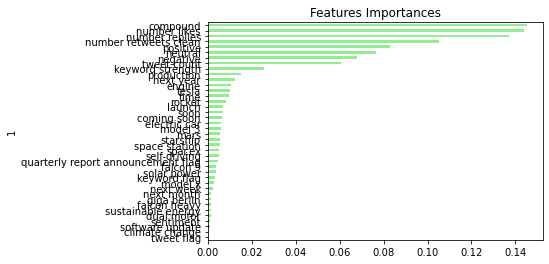

In [77]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
